In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [2]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/sample/meta_Computers.json.gz

--2022-05-23 17:30:07--  http://deepyeti.ucsd.edu/jianmo/amazon/sample/meta_Computers.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7010521 (6.7M) [application/octet-stream]
Saving to: ‘meta_Computers.json.gz.1’

meta_Computers.json 100%[===================>]   6.69M  1.67MB/s    in 5.9s    

2022-05-23 17:30:13 (1.14 MB/s) - ‘meta_Computers.json.gz.1’ saved [7010521/7010521]



In [2]:
### load the meta data

data = []
with gzip.open('meta_Computers.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

18772
{'description': ['Brand new. Still in factory-sealed plastic.'], 'title': 'Kelby Training DVD: The Adobe Photoshop CS5 7-Point System for Camera Raw By Scott Kelby', 'image': ['https://images-na.ssl-images-amazon.com/images/I/31IlLImCVJL._SS40_.jpg'], 'brand': 'Kelby Training', 'rank': ['>#654,681 in Electronics (See Top 100 in Electronics)'], 'main_cat': 'Computers', 'date': 'December 2, 2011', 'asin': '0321732960'}


In [3]:
# convert list into pandas dataframe

df = pd.DataFrame.from_dict(data)

print(len(df))

18772


In [6]:
### remove rows with unformatted title (i.e. some 'title' may still contain html style content)

df3 = df.fillna('')
df4 = df3[df3.title.str.contains('getTime')] # unformatted rows
df5 = df3[~df3.title.str.contains('getTime')] # filter those unformatted rows
print(len(df4))
print(len(df5))

135
18637


In [6]:
# how those unformatted rows look like
df4.iloc[0]

description                                                      
title           var aPageStart = (new Date()).getTime();\nvar ...
image                                                            
brand                                              DS Miller Inc.
rank            [>#1,826,312 in Electronics (See Top 100 in El...
main_cat                                                Computers
date                                                March 1, 2010
asin                                                   B0016C5EXY
feature                                                          
tech1                                                            
also_buy                                                         
price                                                            
also_view                                                        
tech2                                                            
details                                                          
similar_it

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18772 entries, 0 to 18771
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   5130 non-null   object
 1   title         18771 non-null  object
 2   image         14084 non-null  object
 3   brand         18295 non-null  object
 4   rank          18080 non-null  object
 5   main_cat      18772 non-null  object
 6   date          18588 non-null  object
 7   asin          18772 non-null  object
 8   feature       4107 non-null   object
 9   tech1         3586 non-null   object
 10  also_buy      1435 non-null   object
 11  price         2650 non-null   object
 12  also_view     2300 non-null   object
 13  tech2         1659 non-null   object
 14  details       26 non-null     object
 15  similar_item  363 non-null    object
dtypes: object(16)
memory usage: 2.3+ MB


In [4]:
df.head()

,description,title,image,brand,rank,main_cat,date,asin,feature,tech1,also_buy,price,also_view,tech2,details,similar_item
0,[Brand new. Still in factory-sealed plastic.],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...",Computers,"December 2, 2011",0321732960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[If you're already a Photoshop user and want a...,Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...",Computers,"November 7, 2011",0321735722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[School To Home Notes: Note From the Teacher!\...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...",Computers,"June 6, 2007",0439651859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[Dooqi is a young brand specializing in high-e...,"[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...",Computers,"December 5, 2014",0545729971,"[Hard coated for Scratch Proof (Hardness: 4H),...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[Cover for Nook HD],Hd+ Cheetah Cover- Nook,NaN,Nook,"[>#85,661 in Computers & Accessories (See top ...",Computers,"September 11, 2013",0594450284,[Cheetah cover],"{'Brand Name': 'Nook', 'Item Weight': '1 pound...",NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df5.description=df5.description.map(lambda x: str(x))

/Users/nayoungkim/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
df5.columns

Index(['description', 'title', 'image', 'brand', 'rank', 'main_cat', 'date',
       'asin', 'feature', 'tech1', 'also_buy', 'price', 'also_view', 'tech2',
       'details', 'similar_item'],
      dtype='object')

In [11]:
df5.description=df5.description.str.strip("[]'")
df5[df5.description=="Brand new. Still in factory-sealed plastic."]

,description,title,image,brand,rank,main_cat,date,asin,feature,tech1,also_buy,price,also_view,tech2,details,similar_item
0,Brand new. Still in factory-sealed plastic.,Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...",Computers,"December 2, 2011",0321732960,,,,,,,,


In [10]:
df5.drop(columns=['feature', 'tech1', 'also_buy', 'price', 'also_view', 'tech2','details', 'similar_item'],inplace=True)

/Users/nayoungkim/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
df5["brand"].groupby(df5["brand"].isna()).count()

brand
False    18637
Name: brand, dtype: int64

In [14]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18637 entries, 0 to 18771
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  18637 non-null  object
 1   title        18637 non-null  object
 2   image        18637 non-null  object
 3   brand        18637 non-null  object
 4   rank         18637 non-null  object
 5   main_cat     18637 non-null  object
 6   date         18637 non-null  object
 7   asin         18637 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [8]:
df5['brand_cat']=df5.brand.map(lambda x : 0 if len(x) <1 else 1)
df5.brand_cat.unique()

/var/folders/wt/rwb6pf811kx2_nd378hpt9680000gn/T/ipykernel_74007/2771495910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['brand_cat']=df5.brand.map(lambda x : 0 if len(x) <1 else 1)


array([1, 0])

In [11]:
df5.drop(columns="main_cat")

,description,title,image,brand,rank,date,asin,brand_cat
0,['Brand new. Still in factory-sealed plastic.'],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...","December 2, 2011",0321732960,1
1,"[""If you're already a Photoshop user and want ...",Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...","November 7, 2011",0321735722,1
2,['School To Home Notes: Note From the Teacher!...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...","June 6, 2007",0439651859,1
3,"[""Dooqi is a young brand specializing in high-...","[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...","December 5, 2014",0545729971,1
4,['Cover for Nook HD'],Hd+ Cheetah Cover- Nook,,Nook,"[>#85,661 in Computers & Accessories (See top ...","September 11, 2013",0594450284,1
...,...,...,...,...,...,...,...,...
18767,,"iPad Mini 4 Case, Aceguarder New Design [Dirtp...",[https://images-na.ssl-images-amazon.com/image...,,"[>#372,769 in Electronics (See Top 100 in Elec...","July 11, 2016",B01HI72XZW,0
18768,,MIJIU Nylon Canvas Military Tactical Men Waist...,[https://images-na.ssl-images-amazon.com/image...,,"[>#308,759 in Electronics (See Top 100 in Elec...","June 29, 2016",B01HIEI83Q,0
18769,['Deadpool is a mercenary and anti-hero appear...,Marvel Deadpool Laptop Backpack,[https://images-na.ssl-images-amazon.com/image...,Bioworld,"[>#4,064 in Computers & Accessories (See top 1...","June 24, 2016",B01HIQYNJM,1
18770,,Funnel Cup (Ultra Pink),[https://images-na.ssl-images-amazon.com/image...,JDDZ,"[>#449,492 in Electronics (See Top 100 in Elec...","March 5, 2017",B01HIWBL46,1


In [30]:
df5

,description,title,image,brand,rank,main_cat,date,asin,brand_cat,rank1
0,Brand new. Still in factory-sealed plastic.,Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,nan,Computers,"December 2, 2011",0321732960,1,nan
1,"""If you're already a Photoshop user and want a...",Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,nan,Computers,"November 7, 2011",0321735722,1,nan
2,School To Home Notes: Note From the Teacher!\\...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,nan,Computers,"June 6, 2007",0439651859,1,nan
3,"""Dooqi is a young brand specializing in high-e...","[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,nan,Computers,"December 5, 2014",0545729971,1,nan
4,Cover for Nook HD,Hd+ Cheetah Cover- Nook,,Nook,nan,Computers,"September 11, 2013",0594450284,1,nan
...,...,...,...,...,...,...,...,...,...,...
18767,,"iPad Mini 4 Case, Aceguarder New Design [Dirtp...",[https://images-na.ssl-images-amazon.com/image...,,nan,Computers,"July 11, 2016",B01HI72XZW,0,nan
18768,,MIJIU Nylon Canvas Military Tactical Men Waist...,[https://images-na.ssl-images-amazon.com/image...,,nan,Computers,"June 29, 2016",B01HIEI83Q,0,nan
18769,Deadpool is a mercenary and anti-hero appearin...,Marvel Deadpool Laptop Backpack,[https://images-na.ssl-images-amazon.com/image...,Bioworld,nan,Computers,"June 24, 2016",B01HIQYNJM,1,nan
18770,,Funnel Cup (Ultra Pink),[https://images-na.ssl-images-amazon.com/image...,JDDZ,nan,Computers,"March 5, 2017",B01HIWBL46,1,nan


In [27]:
df5['rank1']=df5['rank'].map(lambda x: str(x).strip("[]'"))

/var/folders/wt/rwb6pf811kx2_nd378hpt9680000gn/T/ipykernel_74007/2613211194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['rank1']=df5['rank'].map(lambda x: str(x).strip("[]'"))


In [28]:
df5

,description,title,image,brand,rank,main_cat,date,asin,brand_cat,rank1
0,['Brand new. Still in factory-sealed plastic.'],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...",Computers,"December 2, 2011",0321732960,1,">#654,681 in Electronics (See Top 100 in Elect..."
1,"[""If you're already a Photoshop user and want ...",Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...",Computers,"November 7, 2011",0321735722,1,">#830,165 in Electronics (See Top 100 in Elect..."
2,['School To Home Notes: Note From the Teacher!...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...",Computers,"June 6, 2007",0439651859,1,">#1,233,887 in Electronics (See Top 100 in Ele..."
3,"[""Dooqi is a young brand specializing in high-...","[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...",Computers,"December 5, 2014",0545729971,1,">#454,595 in Electronics (See Top 100 in Elect..."
4,['Cover for Nook HD'],Hd+ Cheetah Cover- Nook,,Nook,"[>#85,661 in Computers & Accessories (See top ...",Computers,"September 11, 2013",0594450284,1,">#85,661 in Computers & Accessories (See top 100)"
...,...,...,...,...,...,...,...,...,...,...
18767,,"iPad Mini 4 Case, Aceguarder New Design [Dirtp...",[https://images-na.ssl-images-amazon.com/image...,,"[>#372,769 in Electronics (See Top 100 in Elec...",Computers,"July 11, 2016",B01HI72XZW,0,">#372,769 in Electronics (See Top 100 in Elect..."
18768,,MIJIU Nylon Canvas Military Tactical Men Waist...,[https://images-na.ssl-images-amazon.com/image...,,"[>#308,759 in Electronics (See Top 100 in Elec...",Computers,"June 29, 2016",B01HIEI83Q,0,">#308,759 in Electronics (See Top 100 in Elect..."
18769,['Deadpool is a mercenary and anti-hero appear...,Marvel Deadpool Laptop Backpack,[https://images-na.ssl-images-amazon.com/image...,Bioworld,"[>#4,064 in Computers & Accessories (See top 1...",Computers,"June 24, 2016",B01HIQYNJM,1,">#4,064 in Computers & Accessories (See top 100)"
18770,,Funnel Cup (Ultra Pink),[https://images-na.ssl-images-amazon.com/image...,JDDZ,"[>#449,492 in Electronics (See Top 100 in Elec...",Computers,"March 5, 2017",B01HIWBL46,1,">#449,492 in Electronics (See Top 100 in Elect..."


In [29]:
df5["rank1"]=df5["rank1"].map(lambda x: str(x))
df5["rank1"]=df5["rank1"].str.replace(pat='>#',repl='', regex=False)

/var/folders/wt/rwb6pf811kx2_nd378hpt9680000gn/T/ipykernel_74007/4145307409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["rank1"]=df5["rank1"].map(lambda x: str(x))
/var/folders/wt/rwb6pf811kx2_nd378hpt9680000gn/T/ipykernel_74007/4145307409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["rank1"]=df5["rank1"].str.replace(pat='>#',repl='', regex=False)


In [30]:
df5["rank1"]=df5["rank1"].map(lambda x: x.replace(",",""))

/var/folders/wt/rwb6pf811kx2_nd378hpt9680000gn/T/ipykernel_74007/2162198519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["rank1"]=df5["rank1"].map(lambda x: x.replace(",",""))


In [31]:
df5["rank1"].head

<bound method NDFrame.head of 0        654681 in Electronics (See Top 100 in Electron...
1        830165 in Electronics (See Top 100 in Electron...
2        1233887 in Electronics (See Top 100 in Electro...
3        454595 in Electronics (See Top 100 in Electron...
4           85661 in Computers & Accessories (See top 100)
                               ...                        
18767    372769 in Electronics (See Top 100 in Electron...
18768    308759 in Electronics (See Top 100 in Electron...
18769        4064 in Computers & Accessories (See top 100)
18770    449492 in Electronics (See Top 100 in Electron...
18771    278362 in Electronics (See Top 100 in Electron...
Name: rank1, Length: 18637, dtype: object>

In [33]:
df5["rank1"]=df5["rank1"].map(lambda x: x.split("in"))

/var/folders/wt/rwb6pf811kx2_nd378hpt9680000gn/T/ipykernel_74007/743146037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["rank1"]=df5["rank1"].map(lambda x: x.split("in"))


In [34]:
df5["rank1"] = df5["rank1"].map(lambda x: x[0])

/var/folders/wt/rwb6pf811kx2_nd378hpt9680000gn/T/ipykernel_74007/1942946291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["rank1"] = df5["rank1"].map(lambda x: x[0])


In [35]:
df5

,description,title,image,brand,rank,main_cat,date,asin,brand_cat,rank1
0,['Brand new. Still in factory-sealed plastic.'],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...",Computers,"December 2, 2011",0321732960,1,654681
1,"[""If you're already a Photoshop user and want ...",Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...",Computers,"November 7, 2011",0321735722,1,830165
2,['School To Home Notes: Note From the Teacher!...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...",Computers,"June 6, 2007",0439651859,1,1233887
3,"[""Dooqi is a young brand specializing in high-...","[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...",Computers,"December 5, 2014",0545729971,1,454595
4,['Cover for Nook HD'],Hd+ Cheetah Cover- Nook,,Nook,"[>#85,661 in Computers & Accessories (See top ...",Computers,"September 11, 2013",0594450284,1,85661
...,...,...,...,...,...,...,...,...,...,...
18767,,"iPad Mini 4 Case, Aceguarder New Design [Dirtp...",[https://images-na.ssl-images-amazon.com/image...,,"[>#372,769 in Electronics (See Top 100 in Elec...",Computers,"July 11, 2016",B01HI72XZW,0,372769
18768,,MIJIU Nylon Canvas Military Tactical Men Waist...,[https://images-na.ssl-images-amazon.com/image...,,"[>#308,759 in Electronics (See Top 100 in Elec...",Computers,"June 29, 2016",B01HIEI83Q,0,308759
18769,['Deadpool is a mercenary and anti-hero appear...,Marvel Deadpool Laptop Backpack,[https://images-na.ssl-images-amazon.com/image...,Bioworld,"[>#4,064 in Computers & Accessories (See top 1...",Computers,"June 24, 2016",B01HIQYNJM,1,4064
18770,,Funnel Cup (Ultra Pink),[https://images-na.ssl-images-amazon.com/image...,JDDZ,"[>#449,492 in Electronics (See Top 100 in Elec...",Computers,"March 5, 2017",B01HIWBL46,1,449492


In [36]:
df6=df5[df5["rank1"]!='']

In [37]:
df6["rank1"]=df6["rank1"].astype("int64")

/var/folders/wt/rwb6pf811kx2_nd378hpt9680000gn/T/ipykernel_74007/2319163233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["rank1"]=df6["rank1"].astype("int64")


In [38]:
df6

,description,title,image,brand,rank,main_cat,date,asin,brand_cat,rank1
0,['Brand new. Still in factory-sealed plastic.'],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...",Computers,"December 2, 2011",0321732960,1,654681
1,"[""If you're already a Photoshop user and want ...",Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...",Computers,"November 7, 2011",0321735722,1,830165
2,['School To Home Notes: Note From the Teacher!...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...",Computers,"June 6, 2007",0439651859,1,1233887
3,"[""Dooqi is a young brand specializing in high-...","[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...",Computers,"December 5, 2014",0545729971,1,454595
4,['Cover for Nook HD'],Hd+ Cheetah Cover- Nook,,Nook,"[>#85,661 in Computers & Accessories (See top ...",Computers,"September 11, 2013",0594450284,1,85661
...,...,...,...,...,...,...,...,...,...,...
18767,,"iPad Mini 4 Case, Aceguarder New Design [Dirtp...",[https://images-na.ssl-images-amazon.com/image...,,"[>#372,769 in Electronics (See Top 100 in Elec...",Computers,"July 11, 2016",B01HI72XZW,0,372769
18768,,MIJIU Nylon Canvas Military Tactical Men Waist...,[https://images-na.ssl-images-amazon.com/image...,,"[>#308,759 in Electronics (See Top 100 in Elec...",Computers,"June 29, 2016",B01HIEI83Q,0,308759
18769,['Deadpool is a mercenary and anti-hero appear...,Marvel Deadpool Laptop Backpack,[https://images-na.ssl-images-amazon.com/image...,Bioworld,"[>#4,064 in Computers & Accessories (See top 1...",Computers,"June 24, 2016",B01HIQYNJM,1,4064
18770,,Funnel Cup (Ultra Pink),[https://images-na.ssl-images-amazon.com/image...,JDDZ,"[>#449,492 in Electronics (See Top 100 in Elec...",Computers,"March 5, 2017",B01HIWBL46,1,449492


In [39]:
df6.sort_values("rank1")

,description,title,image,brand,rank,main_cat,date,asin,brand_cat,rank1
13181,"['Nothing says ""Game Over"" for the Xbox One ex...",Seagate Game Drive for Xbox 2TB Green (STEA200...,[https://images-na.ssl-images-amazon.com/image...,Seagate,[>#54 in Computers & Accessories (See top 100)],Computers,"August 5, 2015",B01065S79E,1,54
18609,"[""This Bundle is only designed for Apple Penci...",[3-Piece] Fintie Bundle for Apple Pencil Cap H...,[https://images-na.ssl-images-amazon.com/image...,Fintie,[>#259 in Electronics (See Top 100 in Electron...,Computers,"June 17, 2016",B01H6Q03IY,1,259
17337,['Logitech Wireless Touch Keyboard K400 Plus L...,Logitech Wireless Touch Keyboard K400 Plus wit...,[https://images-na.ssl-images-amazon.com/image...,Logitech,[>#307 in Computers & Accessories (See top 100)],Computers,"April 8, 2016",B01E0BUPW2,1,307
5859,['Micro USB Host OTG Cable with Micro USB Powe...,DSYJ Micro USB Host OTG Cable with Micro USB P...,,DSYJ,[>#333 in Computers & Accessories (See top 100)],Computers,"May 21, 2013",B00CXAC1ZW,1,333
14412,['SHD(Super High-Definition )Pursuit of High D...,"RJ45 Connectors,SHD Cat6 Connector Cat5e Conne...",[https://images-na.ssl-images-amazon.com/image...,SHD,[>#367 in Electronics (See Top 100 in Electron...,Computers,"November 9, 2017",B015OBFQNK,1,367
...,...,...,...,...,...,...,...,...,...,...
15219,['There are two Network Display amplifiers: th...,Crown DCi 8|600ND | 8 Channel AVB Power Amplif...,[https://images-na.ssl-images-amazon.com/image...,Crown,"[>#2,009,707 in Electronics (See Top 100 in El...",Computers,"March 1, 2016",B017X020NO,1,2009707
15559,,Sling Handle Grip Long Shaped With Strap - Uni...,[https://images-na.ssl-images-amazon.com/image...,SaiTech IT,"[>#2,009,897 in Electronics (See Top 100 in El...",Computers,"June 16, 2016",B0194WKAYA,1,2009897
5136,['Protect Computer Products Ch1110-104 Cherry ...,Protect Computer Products Cherry Kb-0556/ku-05...,,PROTECT COMPUTER PRODUCTS,"[>#2,010,923 in Electronics (See Top 100 in El...",Computers,"December 26, 2012",B00AT4O39Q,1,2010923
15494,,Liili Mouse Pad Natural Rubber Mousepad Basket...,[https://images-na.ssl-images-amazon.com/image...,Liili Inc,"[>#2,033,187 in Office Products (See Top 100 i...",Computers,"May 19, 2016",B018WYMD2S,1,2033187


In [40]:
df5["title_count"] = df5["title"].map(lambda x: len(x))

/var/folders/wt/rwb6pf811kx2_nd378hpt9680000gn/T/ipykernel_74007/2895480165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["title_count"] = df5["title"].map(lambda x: len(x))


In [41]:
df5

,description,title,image,brand,rank,main_cat,date,asin,brand_cat,rank1,title_count
0,['Brand new. Still in factory-sealed plastic.'],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...",Computers,"December 2, 2011",0321732960,1,654681,88
1,"[""If you're already a Photoshop user and want ...",Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...",Computers,"November 7, 2011",0321735722,1,830165,72
2,['School To Home Notes: Note From the Teacher!...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...",Computers,"June 6, 2007",0439651859,1,1233887,58
3,"[""Dooqi is a young brand specializing in high-...","[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...",Computers,"December 5, 2014",0545729971,1,454595,201
4,['Cover for Nook HD'],Hd+ Cheetah Cover- Nook,,Nook,"[>#85,661 in Computers & Accessories (See top ...",Computers,"September 11, 2013",0594450284,1,85661,23
...,...,...,...,...,...,...,...,...,...,...,...
18767,,"iPad Mini 4 Case, Aceguarder New Design [Dirtp...",[https://images-na.ssl-images-amazon.com/image...,,"[>#372,769 in Electronics (See Top 100 in Elec...",Computers,"July 11, 2016",B01HI72XZW,0,372769,187
18768,,MIJIU Nylon Canvas Military Tactical Men Waist...,[https://images-na.ssl-images-amazon.com/image...,,"[>#308,759 in Electronics (See Top 100 in Elec...",Computers,"June 29, 2016",B01HIEI83Q,0,308759,55
18769,['Deadpool is a mercenary and anti-hero appear...,Marvel Deadpool Laptop Backpack,[https://images-na.ssl-images-amazon.com/image...,Bioworld,"[>#4,064 in Computers & Accessories (See top 1...",Computers,"June 24, 2016",B01HIQYNJM,1,4064,31
18770,,Funnel Cup (Ultra Pink),[https://images-na.ssl-images-amazon.com/image...,JDDZ,"[>#449,492 in Electronics (See Top 100 in Elec...",Computers,"March 5, 2017",B01HIWBL46,1,449492,23


In [42]:
df5["desc_count"] = df5["description"].map(lambda x: len(x))
df5["img_count"] = df5["image"].map(lambda x: len(x))

/var/folders/wt/rwb6pf811kx2_nd378hpt9680000gn/T/ipykernel_74007/2157896181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["desc_count"] = df5["description"].map(lambda x: len(x))
/var/folders/wt/rwb6pf811kx2_nd378hpt9680000gn/T/ipykernel_74007/2157896181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["img_count"] = df5["image"].map(lambda x: len(x))


In [59]:
df6=df5[df5["rank1"]!=""]

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [63]:
X = df6[["brand_cat","title_count","desc_count","img_count"]]
# y = df6[["rank1"]].astype("int64")
y=df6.rank1
         
         
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train.shape,X_test.shape

((12566, 4), (5386, 4))

In [64]:
y.info()
# y=df6.rank1

AttributeError: 'Series' object has no attribute 'info'

In [68]:
model = LinearRegression().fit(X_train, y_train)
model.

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([ 22786.03003739,   -379.73338187,   -220.19528687, -52077.40497758]),
 '_residues': 2681625964155208.0,
 'rank_': 4,
 'singular_': array([3.91767251e+04, 8.06835776e+03, 2.57861676e+02, 1.75239792e+01]),
 'intercept_': 796115.181054909}

In [69]:
import matplotlib.pyplot as plt

(array([1953., 1779., 1785., 1790., 1783., 1781., 1776., 1772., 1768.,
        1765.]),
 array([    0. ,  1763.8,  3527.6,  5291.4,  7055.2,  8819. , 10582.8,
        12346.6, 14110.4, 15874.2, 17638. ]),
 <BarContainer object of 10 artists>)

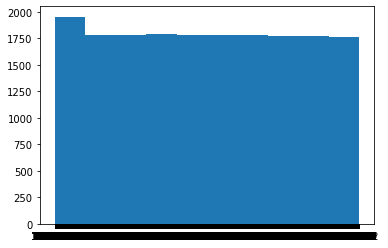

In [70]:
plt.hist(y)